1. ĐỌC FILE DỮ LIỆU CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
from scipy.stats import norm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')

3. KIỂM TRA XEM CÓ DỮ LIỆU NÀO BỊ LỖI KHÔNG 

In [2]:
a = df[(df['TMIN'] > df['TAVG']) & (df['TAVG'] > df['TMAX'])]
a


,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER,ISOUTLIER_MAX,ISOUTLIER_MIN


In [3]:
# kiểm tra xem có bản ghi nào trùng lặp ko
df[df.duplicated()]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER,ISOUTLIER_MAX,ISOUTLIER_MIN


6. NHIỆT ĐỘ TRUNG BÌNH THEO NĂM TRONG PHẠM VI

In [4]:
# temp_avg theo năm
df1 = df[df['ISOUTLIER']==False].groupby('YEAR')['TAVG'].mean().reset_index().round(1)
df1.to_csv('data/temp_year.csv',index= False)

8. NHIỆT ĐỘ MAX, MIN VÀ BIÊN ĐỘ NHIỆT THEO NĂM

In [5]:
# Tính nhiệt độ lớn nhất và nhỏ nhất theo từng năm
temp_max = df.groupby('YEAR')['TMAX'].max().reset_index(name= 'TMAX')
temp_min = df.groupby('YEAR')['TMIN'].min().reset_index(name= 'TMIN')
# Tính biên độ dao động nhiệt theo năm
df1 = df1.merge(temp_max, on='YEAR', how='left')
df1 = df1.merge(temp_min, on='YEAR', how='left')
df1

,YEAR,TAVG,TMAX,TMIN
0,2013,22.8,39.4,-1.1
1,2014,22.9,41.1,-2.3
2,2015,23.6,40.0,1.7
3,2016,23.8,38.9,-1.1
4,2017,23.4,41.6,2.8
5,2018,23.5,40.0,1.1
6,2019,24.4,41.1,0.0
7,2020,23.7,41.1,5.0
8,2021,23.7,40.0,1.2
9,2022,23.3,44.4,3.3


9. XÁC ĐỊNH TUẦN SUẤT NHIỆT CỰC ĐOAN

In [6]:
hot_ = df[df['TMAX']>37].groupby('YEAR')['TMAX'].count().reset_index(name='frequency_hot')
cold_ = df[df['TMIN']<5].groupby('YEAR')['TMIN'].count().reset_index(name='frequency_cold')
df1 = df1.merge(hot_,on='YEAR',how='left')
df1 = df1.merge(cold_,on='YEAR',how='left')
# Thay thế các giá trị NaN trong cột 'frequency_cold' bằng 0
df1['frequency_hot'] = df1['frequency_hot'].fillna(0).astype(int)
df1['frequency_cold'] = df1['frequency_cold'].fillna(0).astype(int)
df1.to_csv('data/temp_year.csv',index=False)

In [7]:
df[['TMAX','TMIN','TAVG']].describe()

,TMAX,TMIN,TAVG
count,21811.000000,21811.000000,21811.000000
mean,27.431594,19.959154,23.570102
std,5.897042,5.421251,5.340713
min,4.400000,-2.300000,2.800000
25%,23.400000,16.600000,20.000000
50%,28.300000,21.100000,24.400000
75%,32.200000,24.400000,27.800000
max,44.400000,31.100000,36.100000


10. VẼ ĐỒ THỊ

Text(0.5, 1.0, 'nhiệt độ trung bình theo năm')

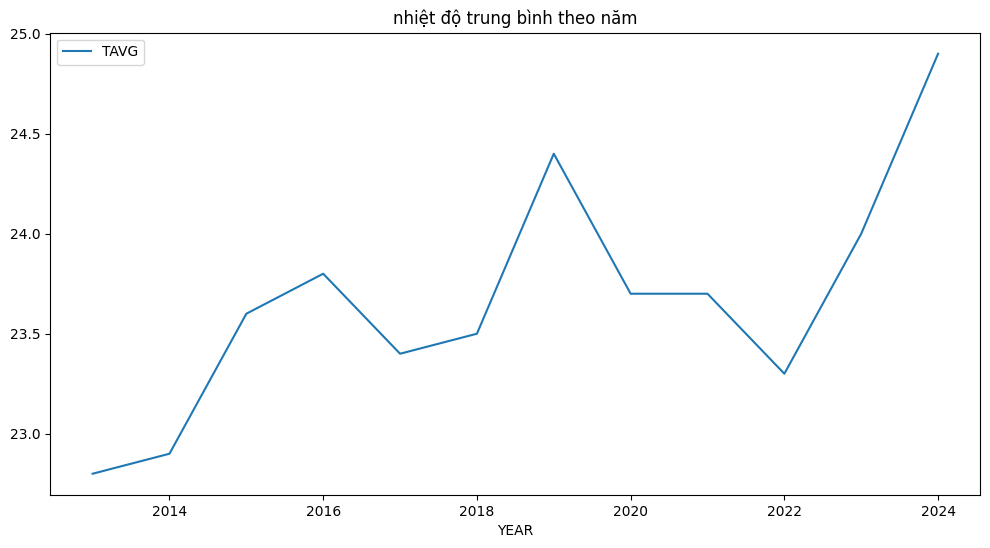

In [8]:
df1.plot(kind= 'line',x='YEAR',y='TAVG',figsize=(12,6))
plt.title('nhiệt độ trung bình theo năm')

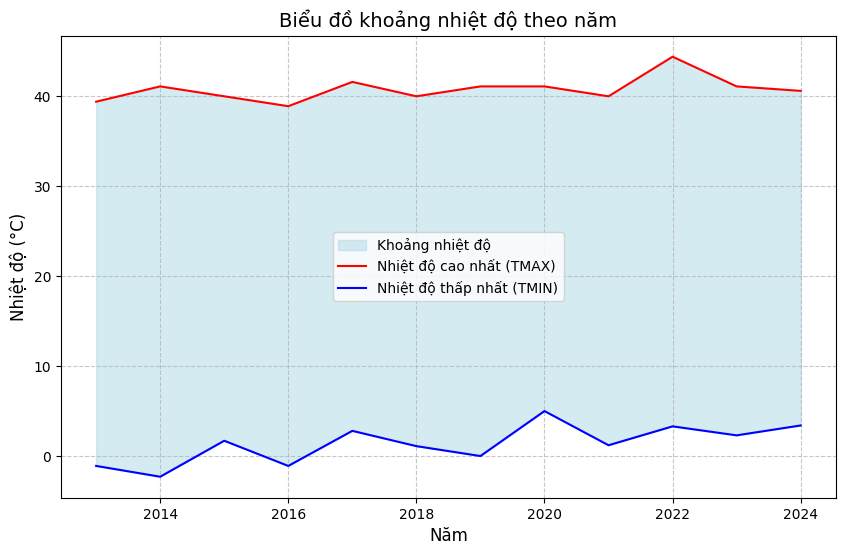

In [9]:
# Vẽ biểu đồ vùng
plt.figure(figsize=(10, 6))
plt.fill_between(df1['YEAR'], df1['TMAX'], df1['TMIN'], color='lightblue', alpha=0.5, label='Khoảng nhiệt độ')
plt.plot(df1['YEAR'], df1['TMAX'], color='red', label='Nhiệt độ cao nhất (TMAX)')
plt.plot(df1['YEAR'], df1['TMIN'], color='blue', label='Nhiệt độ thấp nhất (TMIN)')

# Cấu hình biểu đồ
plt.title('Biểu đồ khoảng nhiệt độ theo năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()


In [10]:
fig = px.bar(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    barmode='group',  # Grouped bar chart
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='So sánh tần số nhiệt độ cực đoan theo năm (Hot và Cold)',
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


In [11]:
fig = px.line(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='Xu hướng tần số nhiệt độ cực đoan theo năm',
    markers=True,
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()

In [12]:
check =(df['ISOUTLIER'] == False) & (df['ISOUTLIER_MAX'] == False) & (df['ISOUTLIER_MIN'] == False)
corr = df[check]
df_corr = corr.groupby(['MONTH','YEAR'])['TAVG'].mean().reset_index()
df_corr1 = corr.groupby(['MONTH','YEAR'])['TMIN'].min().reset_index()
df_corr2 = corr.groupby(['MONTH','YEAR'])['TMAX'].max().reset_index()
df_corr3 = corr.groupby(['MONTH','YEAR'])['PRCP'].sum().reset_index()
df_corr = df_corr.merge(df_corr1,on=['YEAR','MONTH'],how='left')
df_corr = df_corr.merge(df_corr2,on=['YEAR','MONTH'],how='left')
df_corr = df_corr.merge(df_corr3,on=['YEAR','MONTH'],how='left')
df_corr = df_corr[df_corr['YEAR'].isin([2021,2022,2023,2024])]
df_corr.columns = df_corr.columns.str.lower()
df_corr.to_csv('data/correlate.csv',index=False)

11. DỰ BÁO NHIỆT ĐỘ

MAE (Mean Absolute Error): 1.2308465716418582
MSE (Mean Squared Error): 2.7214420090262244


,actual,prediction,diff
DATE,,,
2017-03-24,12.800000,25.722950,12.922950
2021-11-07,15.600000,24.087189,8.487189
2022-02-18,11.300000,19.374330,8.074330
2023-11-12,16.540000,23.947575,7.407575
2018-02-21,15.240000,22.628444,7.388444
...,...,...,...
2018-02-06,12.216667,12.217580,0.000913
2013-06-29,29.183333,29.182908,0.000425
2019-08-25,28.150000,28.150354,0.000354


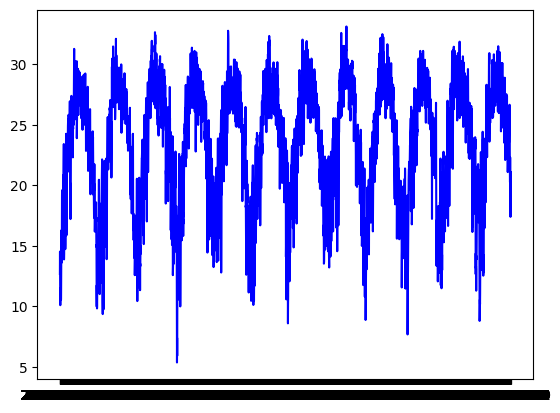

In [13]:
df = df.groupby('DATE')[['TAVG','TMAX','TMIN','PRCP']].mean().reset_index()
plt.plot(df['DATE'], df['TAVG'], label='TAVG', color='blue')
# Đặt cột DATE làm chỉ số (index) của DataFrame
df.set_index(df['DATE'], inplace=True)
df = df.drop('DATE', axis=1)
# Tạo cột 'target' là giá trị TAVG của ngày hôm sau (dùng để dự báo)
df["target"] = df.shift(-1)["TAVG"]
# Điền các giá trị thiếu bằng phương pháp forward fill
df = df.ffill()
# Khởi tạo mô hình hồi quy Ridge với tham số alpha = 0.1
rr = Ridge(alpha=.1)
# Chọn các đặc trưng (predictors) cho mô hình, loại bỏ các cột không sử dụng như 'YEAR', 'MONTH', 'target', 'TAVG'
predictors = df.columns[~df.columns.isin(['YEAR','MONTH','target','TAVG'])]
# Hàm backtest thực hiện dự báo với mô hình đã huấn luyện và trả về kết quả dự báo
def backtest(weather, model, predictors, start=1, step=1):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        # Huấn luyện mô hình trên tập huấn luyện
        model.fit(train[predictors], train["target"])
        
        # Dự báo giá trị trên tập kiểm tra
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        # Kết hợp giá trị thực và dự báo trong một DataFrame
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        # Tính độ lệch tuyệt đối giữa dự báo và giá trị thực
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        # Thêm kết quả vào danh sách
        all_predictions.append(combined)
    
    # Trả về kết quả dự báo đã được kết hợp
    return pd.concat(all_predictions)

predictions = backtest(df, rr, predictors)
mae = mean_absolute_error(predictions["actual"], predictions["prediction"])
mse = mean_squared_error(predictions["actual"], predictions["prediction"])
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MSE (Mean Squared Error): {mse}")
# Sắp xếp các giá trị dự báo theo độ lệch tuyệt đối lớn nhất
predictions.sort_values("diff", ascending=False)


<Axes: xlabel='DATE'>

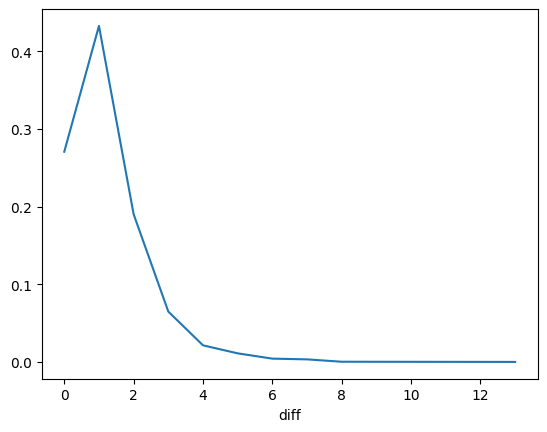

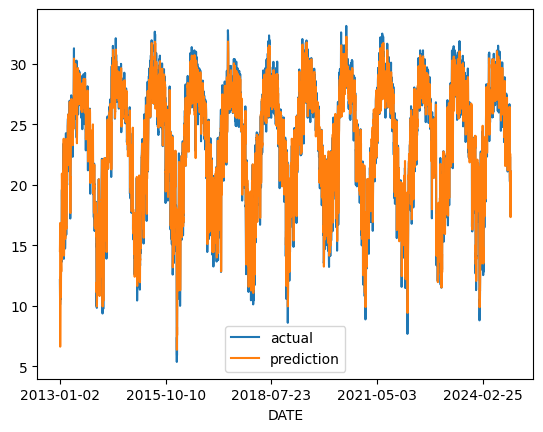

In [14]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()
# Vẽ đồ thị so sánh giữa giá trị thực và giá trị dự báo
predictions[['actual','prediction']].plot()

In [15]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
# Chọn các đặc trưng và target
X = df[['TMAX', 'TMIN', 'PRCP']]  # Thêm 'constant' cho intercept
y = df['target']

# Fit mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()  # OLS là hồi quy bình phương tối thiểu

# Hiển thị kết quả mô hình hồi quy
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.926e+05
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                        0.00
Time:                        22:09:39   Log-Likelihood:                         -8250.9
No. Observations:                4264   AIC:                                  1.651e+04
Df Residuals:                    4261   BIC:                                  1.653e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------